In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

In [8]:
load_dotenv()
DB_CONFIG = {
    'dbname': os.getenv('DB_NAME'),
    'user': os.getenv('DB_USER'),
    'password': os.getenv('DB_PASSWORD'),
    'host': os.getenv('DB_HOST'),
    'port': os.getenv('DB_PORT')
}

engine= create_engine(f"postgresql+psycopg2://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}")

In [10]:
user_features = pd.read_sql("SELECT * FROM user_features", engine)
item_features = pd.read_sql("SELECT * FROM item_features", engine)

print(f"Users: {len(user_features):,}")
print(f"Items: {len(item_features):,}")


Users: 1,407,580
Items: 235,061


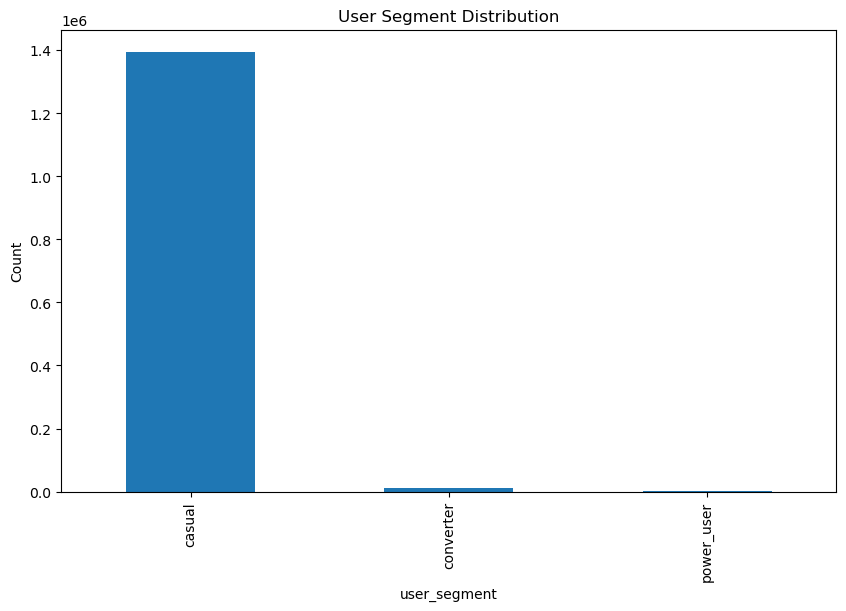

In [11]:
# User segment distribution
plt.figure(figsize=(10, 6))
user_features['user_segment'].value_counts().plot(kind='bar')
plt.title('User Segment Distribution')
plt.ylabel('Count')
plt.show()


In [ ]:
# Conversion by segment
segment_conversion = user_features.groupby('user_segment').agg({
    'total_events': 'mean',
    'total_views': 'mean',
    'total_transactions': 'mean'
})
print("Average Behavior by Segment:")
print(segment_conversion)


Average Behavior by Segment:
              total_events  total_views  total_transactions
user_segment                                               
casual            1.775438     1.746349            0.000000
converter        10.329279     7.388010            1.388271
power_user      389.313725   347.718137           15.877451
